In [3]:
import matplotlib.pyplot as plt
import numpy as np
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.models import Sequential, load_model
import mysql.connector
from keras.optimizers import Adam
from sklearn import preprocessing
import datetime
cnx = mysql.connector.connect(user='root', password='941012',
                              host='127.0.0.1',
                              database='test0')
cursor = cnx.cursor()
query = ("SELECT n2,P1,T1,P2,T2 FROM test0.2016stablepoint LIMIT 1,25000")
cursor.execute(query)
result=cursor.fetchall()
x_list = np.array(result)
scaler = preprocessing.StandardScaler().fit(x_list)
train_x = scaler.transform(x_list)
#print train_x
query = ("SELECT P34 FROM test0.2016stablepoint LIMIT 1,25000")
cursor.execute(query)
result=cursor.fetchall()
y_list = np.array(result)
#print y_list
#print np.hstack((train_x,y_list))
x_list = np.hstack((train_x,y_list))
#result = []
#sequence_length = 5
#for index in range(len(x_list) - sequence_length + 1):
#    result.append(x_list[index: index + sequence_length])
#result = np.array(result)
#np.random.seed(10)
#np.random.shuffle(result)
#print result
row1 = int(round(0.8 * x_list.shape[0]))
row2 = int(round(0.9 * x_list.shape[0]))
train = x_list[:row1, :]
test = x_list[row2:, :]
np.random.seed(10)
np.random.shuffle(train)
X_train = train[:,0:5]
y_train = train[:,-1]
np.random.seed(10)
np.random.shuffle(test)
X_test = test[:,0:5]
y_test = test[:,-1]
y_train = np.reshape(y_train, (y_train.shape[0],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
cursor.close()
cnx.close()
print X_train
print y_train

[[ 0.46463884 -0.51628078 -0.34973113  0.0549582  -0.06162873]
 [-0.47238968 -0.33368351  0.36030331  0.07324581  0.11953605]
 [-0.01041146  0.2722599  -0.30759727  0.77875741  0.41085366]
 ...
 [ 0.46984339  0.99912551 -0.29189066  0.09244082 -0.08600443]
 [-1.40958551  0.79843729 -0.33633349 -0.81231861 -0.61747678]
 [ 0.46605743  0.9974082  -0.45556749  0.09964936 -0.16752138]]
[[47.05466461]
 [46.89541626]
 [48.44330597]
 ...
 [47.27754974]
 [45.21931458]
 [47.26156616]]


In [4]:
model = Sequential()
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))
model.compile(loss='mse', optimizer='adam',metrics=['mae', 'mape'])
starttime = datetime.datetime.now()
model.fit(
    X_train, y_train,
    batch_size=50, epochs=150,validation_split=0.1, verbose=1)
endtime = datetime.datetime.now()
print 'TIME: '+str((endtime - starttime).seconds)

Train on 18000 samples, validate on 2000 samples
Epoch 1/150
18000/18000 [==============================] - 1s 43us/step - loss: 298.7014 - mean_absolute_error: 11.2054 - mean_absolute_percentage_error: 23.9204 - val_loss: 4.9480 - val_mean_absolute_error: 1.7894 - val_mean_absolute_percentage_error: 3.7959
Epoch 2/150
18000/18000 [==============================] - 1s 33us/step - loss: 11.8659 - mean_absolute_error: 2.7233 - mean_absolute_percentage_error: 5.8147 - val_loss: 1.3479 - val_mean_absolute_error: 1.0012 - val_mean_absolute_percentage_error: 2.1369
Epoch 3/150
18000/18000 [==============================] - 1s 33us/step - loss: 9.6070 - mean_absolute_error: 2.4686 - mean_absolute_percentage_error: 5.2732 - val_loss: 1.1419 - val_mean_absolute_error: 0.9706 - val_mean_absolute_percentage_error: 2.0658
Epoch 4/150
18000/18000 [==============================] - 1s 34us/step - loss: 9.1943 - mean_absolute_error: 2.4180 - mean_absolute_percentage_error: 5.1655 - val_loss: 0.1613 -

Epoch 33/150
18000/18000 [==============================] - 1s 31us/step - loss: 5.6418 - mean_absolute_error: 1.8976 - mean_absolute_percentage_error: 4.0518 - val_loss: 0.2811 - val_mean_absolute_error: 0.4947 - val_mean_absolute_percentage_error: 1.0688
Epoch 34/150
18000/18000 [==============================] - 1s 36us/step - loss: 5.5204 - mean_absolute_error: 1.8668 - mean_absolute_percentage_error: 3.9857 - val_loss: 0.1104 - val_mean_absolute_error: 0.2970 - val_mean_absolute_percentage_error: 0.6419
Epoch 35/150
18000/18000 [==============================] - 1s 31us/step - loss: 5.4035 - mean_absolute_error: 1.8494 - mean_absolute_percentage_error: 3.9487 - val_loss: 0.0514 - val_mean_absolute_error: 0.1871 - val_mean_absolute_percentage_error: 0.3923
Epoch 36/150
18000/18000 [==============================] - 1s 32us/step - loss: 5.3220 - mean_absolute_error: 1.8290 - mean_absolute_percentage_error: 3.9045 - val_loss: 0.3568 - val_mean_absolute_error: 0.4803 - val_mean_absolu

Epoch 65/150
18000/18000 [==============================] - 1s 34us/step - loss: 4.3376 - mean_absolute_error: 1.6591 - mean_absolute_percentage_error: 3.5438 - val_loss: 0.3515 - val_mean_absolute_error: 0.4597 - val_mean_absolute_percentage_error: 0.9495
Epoch 66/150
18000/18000 [==============================] - 1s 34us/step - loss: 4.2647 - mean_absolute_error: 1.6453 - mean_absolute_percentage_error: 3.5132 - val_loss: 0.0629 - val_mean_absolute_error: 0.2217 - val_mean_absolute_percentage_error: 0.4811
Epoch 67/150
18000/18000 [==============================] - 1s 33us/step - loss: 4.1955 - mean_absolute_error: 1.6343 - mean_absolute_percentage_error: 3.4901 - val_loss: 0.0675 - val_mean_absolute_error: 0.2387 - val_mean_absolute_percentage_error: 0.5115
Epoch 68/150
18000/18000 [==============================] - 1s 34us/step - loss: 4.1928 - mean_absolute_error: 1.6327 - mean_absolute_percentage_error: 3.4847 - val_loss: 0.1153 - val_mean_absolute_error: 0.2552 - val_mean_absolu

Epoch 97/150
18000/18000 [==============================] - 1s 42us/step - loss: 3.6192 - mean_absolute_error: 1.5180 - mean_absolute_percentage_error: 3.2408 - val_loss: 0.2001 - val_mean_absolute_error: 0.3003 - val_mean_absolute_percentage_error: 0.6133
Epoch 98/150
18000/18000 [==============================] - 1s 33us/step - loss: 3.5715 - mean_absolute_error: 1.5068 - mean_absolute_percentage_error: 3.2171 - val_loss: 0.0275 - val_mean_absolute_error: 0.1387 - val_mean_absolute_percentage_error: 0.2999
Epoch 99/150
18000/18000 [==============================] - 1s 34us/step - loss: 3.6103 - mean_absolute_error: 1.5142 - mean_absolute_percentage_error: 3.2333 - val_loss: 0.0456 - val_mean_absolute_error: 0.1789 - val_mean_absolute_percentage_error: 0.3908
Epoch 100/150
18000/18000 [==============================] - 1s 41us/step - loss: 3.6516 - mean_absolute_error: 1.5190 - mean_absolute_percentage_error: 3.2426 - val_loss: 0.0751 - val_mean_absolute_error: 0.2396 - val_mean_absol

Epoch 129/150
18000/18000 [==============================] - 1s 32us/step - loss: 3.0799 - mean_absolute_error: 1.3988 - mean_absolute_percentage_error: 2.9858 - val_loss: 0.1025 - val_mean_absolute_error: 0.2202 - val_mean_absolute_percentage_error: 0.4511
Epoch 130/150
18000/18000 [==============================] - 1s 32us/step - loss: 3.1105 - mean_absolute_error: 1.4043 - mean_absolute_percentage_error: 2.9981 - val_loss: 0.0358 - val_mean_absolute_error: 0.1682 - val_mean_absolute_percentage_error: 0.3562
Epoch 131/150
18000/18000 [==============================] - 1s 31us/step - loss: 2.9994 - mean_absolute_error: 1.3818 - mean_absolute_percentage_error: 2.9492 - val_loss: 0.0102 - val_mean_absolute_error: 0.0809 - val_mean_absolute_percentage_error: 0.1726
Epoch 132/150
18000/18000 [==============================] - 1s 32us/step - loss: 3.0690 - mean_absolute_error: 1.3989 - mean_absolute_percentage_error: 2.9859 - val_loss: 0.0209 - val_mean_absolute_error: 0.1175 - val_mean_ab

In [3]:
predicted = model.predict(X_test)

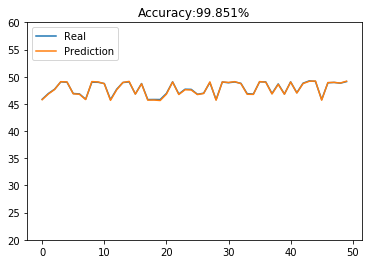

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
a = np.load('/home/wuhang/LSTM_code/testout.npy')
#ax.plot(a[0:50],label="Real")
ax.plot(y_test[0:50],label="Real")
ax.legend(loc='upper left')
plt.plot(predicted[0:50],label="Prediction")
plt.legend(loc='upper left')
plt.ylim(20,60)
acc = np.ones((y_test.shape[0],1))-abs((predicted-y_test)/y_test)
acc = round(np.mean(acc),5)
plt.title('Accuracy:'+str(100*acc)+'%')
plt.show()
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [1]:
X_test = np.load('/home/wuhang/MLP/testinput.npy')
y_test = np.load('/home/wuhang/MLP/testout.npy')
model = models.load_model('/home/wuhang/MLP/model01.h5')
predicted1 = model.predict(X_test)
#print predicted1
model = models.load_model('/home/wuhang/MLP/model02.h5')
predicted2 = model.predict(X_test)
predicted = (predicted1 + predicted2)/2
acc = np.ones((y_test.shape[0],1))-abs((predicted-y_test)/y_test)
acc = 100*round(np.mean(acc),5)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(y_test[1:50],label="Real")
ax.legend(loc='upper left')
plt.plot(predicted[1:50],label="Prediction")
plt.legend(loc='upper left')
plt.ylim(20,60)
plt.title('Accuracy:'+str(acc)+'%')
plt.show()

Using TensorFlow backend.


ValueError: Error when checking input: expected conv2d_1_input to have 4 dimensions, but got array with shape (2500, 5)

In [6]:
print X_test
X_test = np.load('/home/wuhang/MLP/testinput.npy')
y_test = np.load('/home/wuhang/MLP/testout.npy')
predicted1 = model.predict(X_test)


[[-0.01238694 -1.07707082 -0.34372545 -0.48738991 -0.51999845]
 [ 0.46842251 -1.16586751 -0.29627015 -0.00233526 -0.1193844 ]
 [ 0.54467788 -0.846004   -0.10101495  0.43281001  0.17390697]
 ...
 [ 0.54372681 -1.3982075   0.58107638  0.4148437   0.56277087]
 [-0.00904329 -1.0543905  -0.33237759 -0.59286723 -0.53416278]
 [ 0.54150382 -1.27707804  0.51174438  0.38436136  0.53367554]]


In [7]:
xx = np.load('/home/wuhang/MLP/inputdata11.npy')
print xx

[[-1.40388824 -0.3144082  -0.3488773  -1.14011525 -0.86266651]
 [ 0.46842251  0.83429351 -0.57657136  0.14352535 -0.19210098]
 [-0.00995541  0.43063719 -0.38802535  0.74227441  0.39465304]
 ...
 [ 0.46984339  0.99912551 -0.29189066  0.09244082 -0.08600443]
 [-1.40958551  0.79843729 -0.33633349 -0.81231861 -0.61747678]
 [ 0.46605743  0.9974082  -0.45556749  0.09964936 -0.16752138]]
